In [ ]:
import os

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

## Read jet core algorithm anomalies

In [2]:
jca_name = "u"

In [3]:
var_names = {"k06": "weighted_average_ws", "s09": "jet_occurence", "m11": "jet_region_mask", "po13": "local_wind_maxima",  "k14": "jet_occurence", "u": "u"}
var_name = var_names[jca_name]
var_name_norm = f'{var_name}_norm'

In [4]:
jca = xr.open_mfdataset(f'../data/jet_stream/{jca_name}_*.nc')

In [5]:
jca = jca.sortby('lat')

/home/thomaskeel/miniconda3/envs/jsanalysis/lib/python3.11/site-packages/xarray/core/indexing.py:1384: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


# load extreme ('persistent') cold data

In [6]:
extreme_cold_persist_thresh = xr.open_dataset('/home/thomaskeel/Dev/Research Projects/jet-extreme-weather-linkage/input_preparation/outputs/ar6_3daypersist_extreme_cold_detrend_95thpercthresh_q01.nc')

In [7]:
extreme_cold_persist_thresh['cold_air_event_CNA'].to_pandas().value_counts()

0    29525
1      910
dtype: int64

# Main functions

In [8]:
NUM_DAYS_BREAK = 1


def cluster_datetimes(dates):
    clusters = []
    current_cluster = [dates[0].data]
    
    for i in range(1, len(dates)):
        if pd.to_timedelta(int(dates[i] - dates[i - 1])).days > NUM_DAYS_BREAK:
            # Start a new cluster
            clusters.append(current_cluster)
            current_cluster = [dates[i].data]
        else:
            # Add to the current cluster
            current_cluster.append(dates[i].data)
    
    # Add the last cluster
    clusters.append(current_cluster)
    
    return clusters

# Look at all cold air codes 

In [9]:
all_cold_event_codes = np.unique(extreme_cold_persist_thresh['cold_air_event_stacked_names'])

In [10]:
np.unique(extreme_cold_persist_thresh['cold_air_event_stacked_names'])

array(['000', '001', '010', '011', '100', '101', '110', '111'],
      dtype=object)

In [11]:
THRESHOLD_FOR_CROSSHATCH = 0.66 ## 66%

In [12]:
extreme_cold_persist_thresh.load()

<xarray.Dataset>
Dimensions:                          (lon: 91, lat: 41, time: 30435,
                                      ar6_region: 3)
Coordinates:
  * lon                              (lon) float32 -130.0 -129.0 ... -41.0 -40.0
  * lat                              (lat) float32 20.0 21.0 22.0 ... 59.0 60.0
  * time                             (time) datetime64[ns] 1940-01-01 ... 202...
    dayofyear                        (time) int64 1 2 3 4 5 ... 117 118 119 120
    quantile                         float64 0.01
Dimensions without coordinates: ar6_region
Data variables:
    wna_perc_coverage                (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    cna_perc_coverage                (time) float64 0.3745 9.363 ... 0.0 0.0
    ena_perc_coverage                (time) float64 6.105 8.43 10.47 ... 0.0 0.0
    cold_air_event_WNA               (time) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    cold_air_event_CNA               (time) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    cold_air_event_ENA               (time) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    cold_air_event_stacked           (ar6_region, time) int64 0 0 0 0 ... 0 0 0
    cold_air_event_stacked_names     (time) object '000' '000' ... '000' '000'
    cold_air_event_stacked_codified  (time) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0

In [13]:
jca[var_name_norm].load()

<xarray.DataArray 'u_norm' (time: 15309, lat: 91, lon: 360)>
array([[[ 1.05871878e+01,  1.02744751e+01,  9.54190254e+00, ...,
          1.19112482e+01,  1.15567303e+01,  1.07478294e+01],
        [ 9.58658886e+00,  9.48301411e+00,  9.04524803e+00, ...,
          1.10609264e+01,  1.06234045e+01,  1.01669359e+01],
        [ 8.42471695e+00,  7.70409155e+00,  7.04517555e+00, ...,
          8.82349586e+00,  8.81814957e+00,  8.69780350e+00],
        ...,
        [-1.85297661e+01, -1.87113895e+01, -1.88884487e+01, ...,
         -1.79583588e+01, -1.81531963e+01, -1.83446712e+01],
        [-1.42143841e+01, -1.44474859e+01, -1.46759539e+01, ...,
         -1.34822989e+01, -1.37322950e+01, -1.39771242e+01],
        [-2.94443656e-04, -2.94443656e-04, -2.94443656e-04, ...,
         -2.94443656e-04, -2.94443656e-04, -2.94443656e-04]],

       [[ 6.26350689e+00,  6.33946657e+00,  6.43697214e+00, ...,
          4.71354389e+00,  5.59974861e+00,  5.97200012e+00],
        [ 5.27511549e+00,  5.69497776e+00,  5.34412622e+00, ...,
          4.24798822e+00,  5.01456738e+00,  4.89501286e+00],
        [ 4.98482513e+00,  4.87943411e+00,  4.64190483e+00, ...,
          4.12237406e+00,  3.61800408e+00,  4.37119293e+00],
...
         -1.07292709e+01, -1.06736984e+01, -1.06119928e+01],
        [-7.49165535e+00, -7.44355154e+00, -7.39320850e+00, ...,
         -7.62355042e+00, -7.58119011e+00, -7.53802443e+00],
        [-2.34221534e-05, -2.34221534e-05, -2.34221534e-05, ...,
         -2.34221534e-05, -2.34221534e-05, -2.34221534e-05]],

       [[ 5.55095100e+00,  6.34109402e+00,  7.03321123e+00, ...,
          4.97128963e+00,  5.56313705e+00,  5.68986988e+00],
        [ 6.00994587e+00,  5.84967327e+00,  6.56676626e+00, ...,
          5.70264006e+00,  6.14531898e+00,  6.44821835e+00],
        [ 6.61525774e+00,  6.76124334e+00,  6.82647467e+00, ...,
          5.54191971e+00,  6.27378321e+00,  6.37929535e+00],
        ...,
        [ 6.84787893e+00,  6.94689989e+00,  7.04491520e+00, ...,
          6.54997206e+00,  6.64900208e+00,  6.74879313e+00],
        [ 6.67870140e+00,  6.66918802e+00,  6.65800762e+00, ...,
          6.69036102e+00,  6.68877602e+00,  6.68506670e+00],
        [-5.65109192e-04, -5.65109192e-04, -5.65109192e-04, ...,
         -5.65109192e-04, -5.65109192e-04, -5.65109192e-04]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
  * lat      (lat) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12

In [14]:
extreme_cold_persist_thresh = extreme_cold_persist_thresh.sel(time=slice(jca.time.min().data, jca.time.max().data))

In [15]:
def make_jca_season_ds(season_composite_ds, season):
    for coldairevent_code in all_cold_event_codes:
        # if coldairevent_code == '101':
        #     continue
        onetype_coldair_event = extreme_cold_persist_thresh.where((extreme_cold_persist_thresh['cold_air_event_stacked_names'] == coldairevent_code)\
                                                ).dropna(dim='time')
        onetype_coldair_event_djf = onetype_coldair_event.sel(time=onetype_coldair_event.time.dt.season.isin([season]))
        if onetype_coldair_event_djf.time.size < 1:
            continue
        print(coldairevent_code)
        cold_air_event_dateclusters = cluster_datetimes(onetype_coldair_event_djf.time)
        jca_my_persist = jca.sel(time=onetype_coldair_event_djf.time.data)
        for ind, dt_cluster in enumerate(cold_air_event_dateclusters):
            if ind == 0:
                jca_my_persist_weighted = jca_my_persist.sel(time=dt_cluster).mean('time')
            else:
                jca_my_persist_weighted = xr.concat([jca_my_persist_weighted, jca_my_persist.sel(time=dt_cluster).mean('time')], dim='time')
        if 'time' not in jca_my_persist_weighted.dims:
            print('time not in dims')
            jca_my_persist_weighted = jca_my_persist_weighted.expand_dims('time')
        
        jca_my_persist_mean_weighted = jca_my_persist_weighted.mean('time')
        sign_crosshatching = np.sign(jca_my_persist_weighted[var_name_norm]) == np.sign(jca_my_persist_mean_weighted[var_name_norm])
        sign_crosshatching_time_mean = sign_crosshatching.sum(('time'))
        sign_crosshatching_time_mean_mask = (sign_crosshatching_time_mean / jca_my_persist_weighted.time.size) > THRESHOLD_FOR_CROSSHATCH
        
        season_composite_ds[coldairevent_code] = jca_my_persist_mean_weighted[var_name_norm]
        season_composite_ds[f'{coldairevent_code}_mask'] = sign_crosshatching_time_mean_mask
    return season_composite_ds

In [16]:
%%time
if not os.path.exists(f'outputs/djf_{jca_name}_composites.nc'):
    print(f'making {jca_name} composites')
    djf_jca_composites = xr.Dataset()
    djf_jca_composites = make_jca_season_ds(djf_jca_composites, 'DJF')
    djf_jca_composites.to_netcdf(f'outputs/djf_{jca_name}_composites.nc')
else:
    print(f'loading {jca_name} composites')
    djf_jca_composites = xr.open_dataset(f'outputs/djf_{jca_name}_composites.nc')

loading u composites
CPU times: user 27.5 ms, sys: 4.17 ms, total: 31.7 ms
Wall time: 32.2 ms


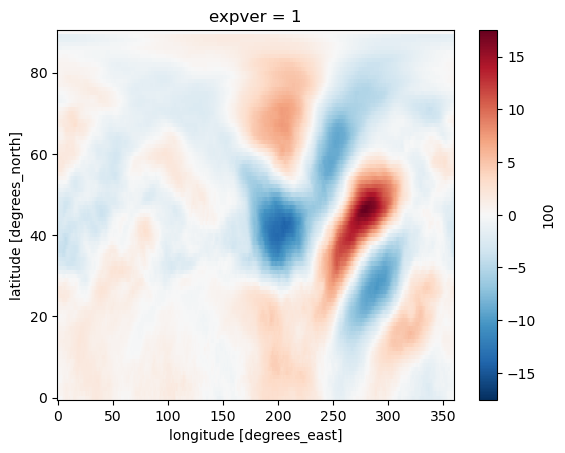

In [17]:
djf_jca_composites['100'].plot()

In [18]:
djf_u_composites = xr.open_dataset(f'outputs/djf_u_composites.nc')
djf_k06_composites = xr.open_dataset(f'outputs/djf_k06_composites.nc')
djf_s09_composites = xr.open_dataset(f'outputs/djf_s09_composites.nc')
djf_m11_composites = xr.open_dataset(f'outputs/djf_m11_composites.nc')
djf_po13_composites = xr.open_dataset(f'outputs/djf_po13_composites.nc')
djf_k14_composites = xr.open_dataset(f'outputs/djf_k14_composites.nc')

In [19]:
proj = ccrs.PlateCarree(central_longitude=180)
box_proj = ccrs.PlateCarree(central_longitude=0)

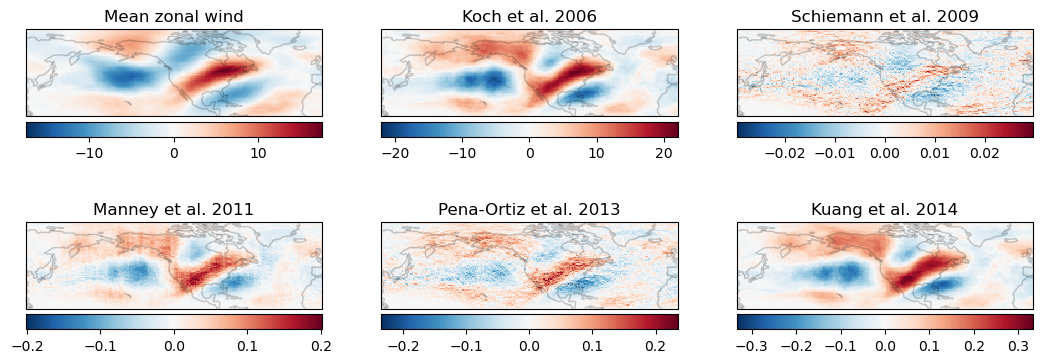

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(13, 5), subplot_kw={'projection': proj})
djf_composites = [djf_u_composites, djf_k06_composites, djf_s09_composites, djf_m11_composites, djf_po13_composites, djf_k14_composites]
composite_titles = ["Mean zonal wind", "Koch et al. 2006",  "Schiemann et al. 2009", "Manney et al. 2011", "Pena-Ortiz et al. 2013", "Kuang et al. 2014"]


for ind, ax in enumerate(axes.flatten()):
    djf_composites[ind]['100'].plot(ax=ax, transform=box_proj, cbar_kwargs={'orientation':'horizontal', 'pad':0.03, 'label':None})
    ax.set_title(composite_titles[ind])
    ax.coastlines(alpha=.2)
    ax.set_extent([120, 359, 10, 80], crs=box_proj)
fig.subplots_adjust(hspace=0)
# fig.savefig('figures/compare_jet_cores_100.png', dpi=300, bbox_inches='tight')

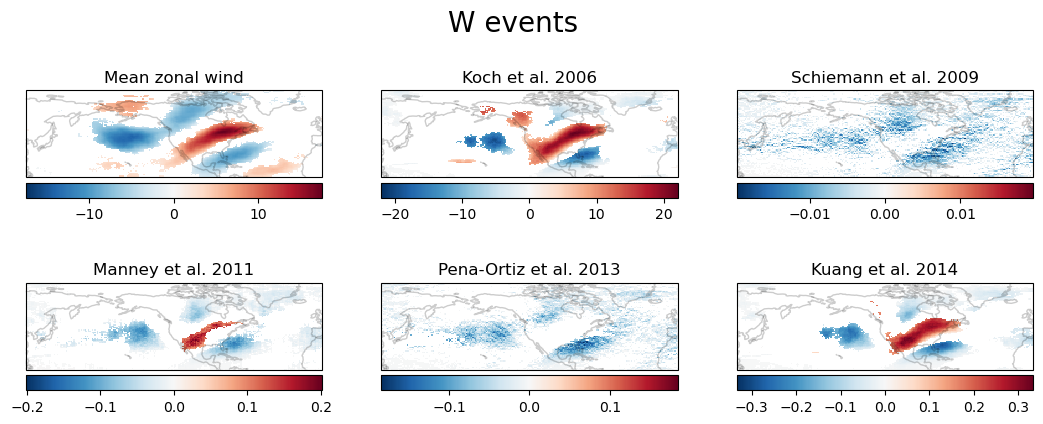

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(13, 5), subplot_kw={'projection': proj})
djf_composites = [djf_u_composites, djf_k06_composites, djf_s09_composites, djf_m11_composites, djf_po13_composites, djf_k14_composites]
composite_titles = ["Mean zonal wind", "Koch et al. 2006",  "Schiemann et al. 2009", "Manney et al. 2011", "Pena-Ortiz et al. 2013", "Kuang et al. 2014"]


for ind, ax in enumerate(axes.flatten()):
    djf_composites[ind]['100'].where(djf_composites[ind]['100_mask']).plot(ax=ax, center=0, cmap='RdBu_r', transform=box_proj, cbar_kwargs={'orientation':'horizontal', 'pad':0.03, 'label':None})
    ax.set_title(composite_titles[ind])
    ax.coastlines(alpha=.2)
    ax.set_extent([120, 359, 10, 80], crs=box_proj)
fig.suptitle('W events', y=0.9, size=20)
fig.subplots_adjust(hspace=0)
# fig.savefig('figures/compare_jet_cores_100_mask.png', dpi=300, bbox_inches='tight')

In [22]:
cao_codes = ['001', '010', '100', '110', '011', '111']
cao_names = ['E', 'C', 'W', 'WC', 'CE', 'WCE']
cao_names_dict = dict(zip(cao_codes, cao_names))

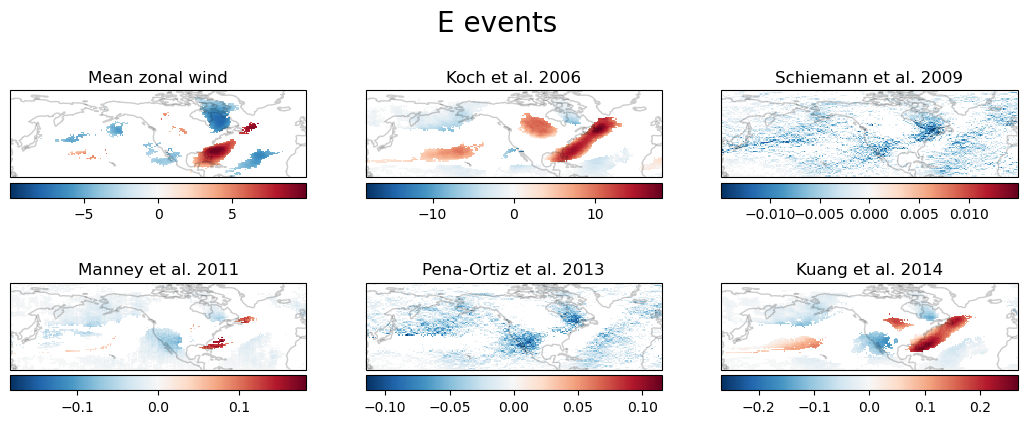

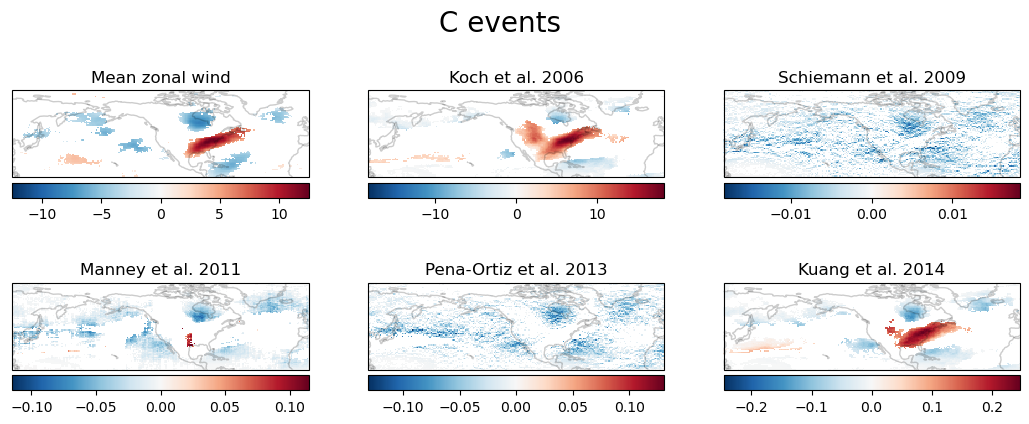

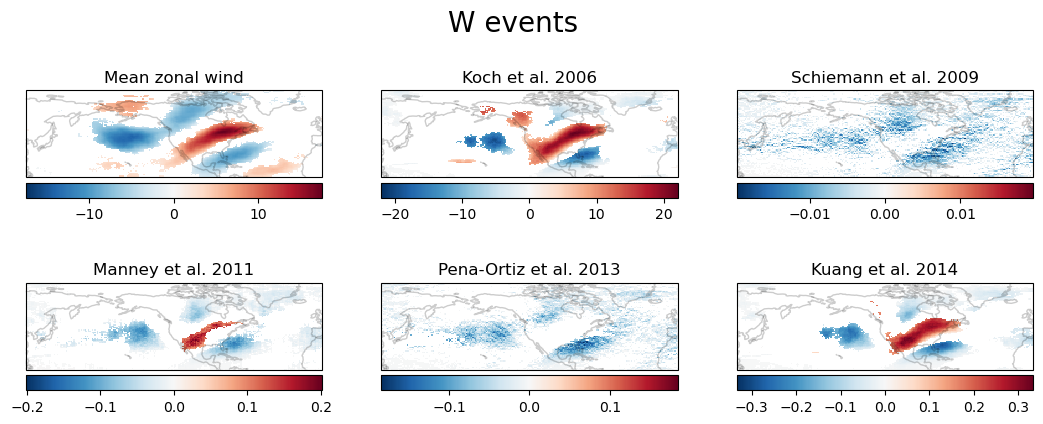

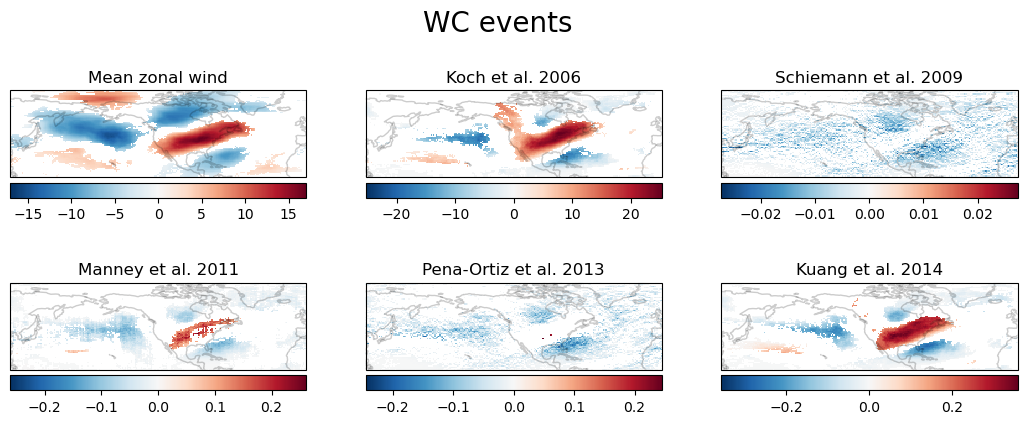

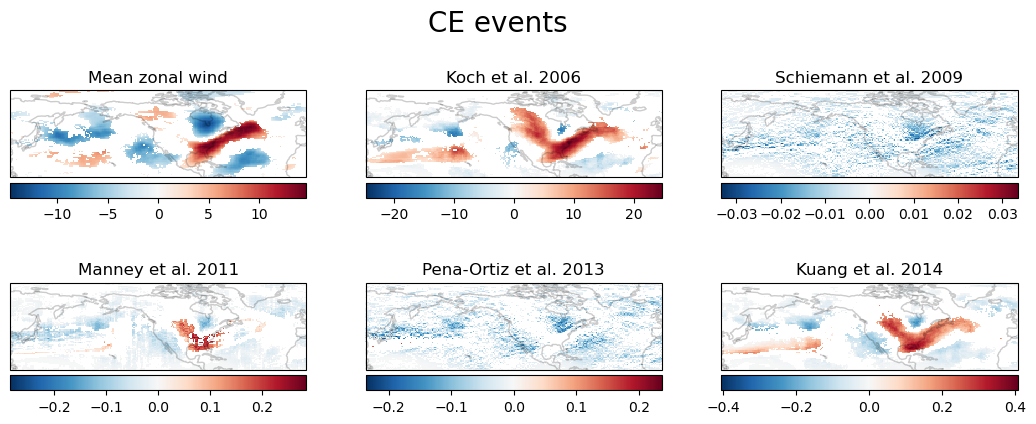

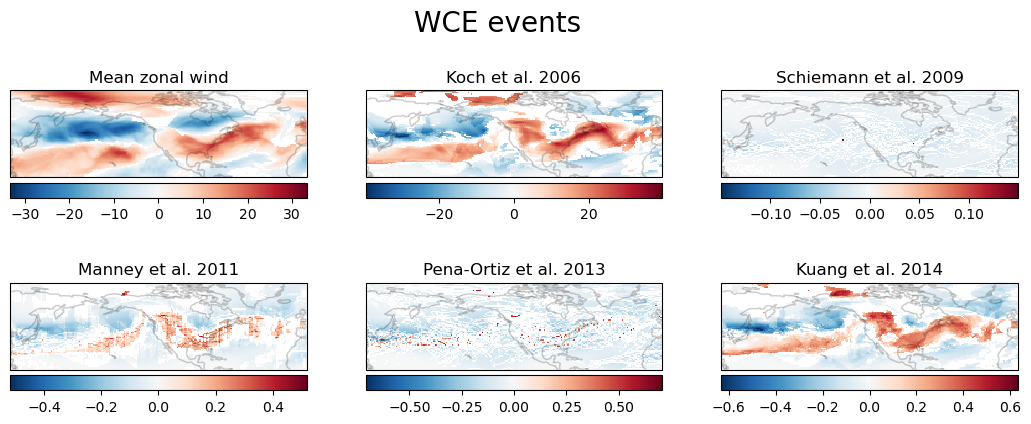

In [23]:
djf_composites = [djf_u_composites, djf_k06_composites, djf_s09_composites, djf_m11_composites, djf_po13_composites, djf_k14_composites]
composite_titles = ["Mean zonal wind", "Koch et al. 2006",  "Schiemann et al. 2009", "Manney et al. 2011", "Pena-Ortiz et al. 2013", "Kuang et al. 2014"]

for cao_code in cao_codes:
    fig, axes = plt.subplots(2, 3, figsize=(13, 5), subplot_kw={'projection': proj})
    for ind, ax in enumerate(axes.flatten()):
        djf_composites[ind][cao_code].where(djf_composites[ind][f'{cao_code}_mask']).plot(ax=ax, center=0, cmap='RdBu_r', transform=box_proj, cbar_kwargs={'orientation':'horizontal', 'pad':0.03, 'label':None})
        ax.set_title(composite_titles[ind])
        ax.coastlines(alpha=.2)
        ax.set_extent([120, 359, 10, 80], crs=box_proj)
    fig.subplots_adjust(hspace=0)
    fig.suptitle(f'{cao_names_dict[cao_code]} events', y=0.9, size=20)
    # fig.savefig(f'figures/compare_jet_cores_{cao_code}_mask.png', dpi=300, bbox_inches='tight')
    plt.show()

# Make lagged composite

In [24]:
jca

<xarray.Dataset>
Dimensions:  (time: 15309, lat: 91, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-12-31
  * lat      (lat) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 86.0 87.0 88.0 89.0 90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    month    (time) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12
Data variables:
    u_norm   (time, lat, lon) float32 10.59 10.27 ... -0.0005651 -0.0005651

In [25]:
var_name_norm

'u_norm'

In [26]:
SEASON_TO_USE = 'DJF'

In [27]:
%%time
time_lags = np.arange(-20, 21) # -20 to +20 days

trough_vals_100 = []
npj_vals_100 = []

trough_vals_010 = []
npj_vals_010 = []

trough_vals_001 = []
npj_vals_001 = []

for lag in time_lags:
    print(f'lag of {lag} days')
    # 100
    onetype_coldair_event = extreme_cold_persist_thresh.where((extreme_cold_persist_thresh['cold_air_event_stacked_names'] == '100')\
                                        ).dropna(dim='time')
    type100_coldair_event_djf = onetype_coldair_event.sel(time=onetype_coldair_event.time.dt.season.isin([SEASON_TO_USE]))
    type100_coldair_event_lagged_times = type100_coldair_event_djf.time + np.timedelta64(lag, 'D')

    # 010
    onetype_coldair_event = extreme_cold_persist_thresh.where((extreme_cold_persist_thresh['cold_air_event_stacked_names'] == '010')\
                                        ).dropna(dim='time')
    type010_coldair_event_djf = onetype_coldair_event.sel(time=onetype_coldair_event.time.dt.season.isin([SEASON_TO_USE]))
    type010_coldair_event_lagged_times = type010_coldair_event_djf.time + np.timedelta64(lag, 'D')

    # 001
    onetype_coldair_event = extreme_cold_persist_thresh.where((extreme_cold_persist_thresh['cold_air_event_stacked_names'] == '001')\
                                        ).dropna(dim='time')
    type001_coldair_event_djf = onetype_coldair_event.sel(time=onetype_coldair_event.time.dt.season.isin([SEASON_TO_USE]))
    
    type001_coldair_event_lagged_times = type001_coldair_event_djf.time + np.timedelta64(lag, 'D')

    cold_air_event_dateclusters_lagged_100 = cluster_datetimes(type100_coldair_event_lagged_times)
    cold_air_event_dateclusters_lagged_010 = cluster_datetimes(type010_coldair_event_lagged_times)
    cold_air_event_dateclusters_lagged_001 = cluster_datetimes(type001_coldair_event_lagged_times)

    try:
        jca.sel(time=type010_coldair_event_lagged_times)
    except:
        type010_coldair_event_lagged_times = type010_coldair_event_lagged_times[1:]
        cold_air_event_dateclusters_lagged_010 = cold_air_event_dateclusters_lagged_010[1:]
        
    try:
        jca.sel(time=type100_coldair_event_lagged_times)
    except:
        type100_coldair_event_lagged_times = type100_coldair_event_lagged_times[1:]
        cold_air_event_dateclusters_lagged_100 = cold_air_event_dateclusters_lagged_100[1:]
    
    jca_my_persist_lagged_100 = jca.sel(time=type100_coldair_event_lagged_times)
    jca_my_persist_lagged_010 = jca.sel(time=type010_coldair_event_lagged_times)
    jca_my_persist_lagged_001 = jca.sel(time=type001_coldair_event_lagged_times)
    
    # with weighting
    for ind, dt_cluster in enumerate(cold_air_event_dateclusters_lagged_100):
        # if lag < 0:
        #     #negative lag
        #     dt_cluster = [dt_cluster[0]]
        # else:
        #     dt_cluster = [dt_cluster[-1]]

        if ind == 0:
            jca_my_persist_lagged_weighted_100 = jca_my_persist_lagged_100.sel(time=dt_cluster).mean('time')
        else:
            jca_my_persist_lagged_weighted_100 = xr.concat([jca_my_persist_lagged_weighted_100, jca_my_persist_lagged_100.sel(time=dt_cluster).mean('time')], dim='time')

    jca_my_persist_lagged_mean_weighted_100 = jca_my_persist_lagged_weighted_100.mean('time')
    
    # with weighting
    for ind, dt_cluster in enumerate(cold_air_event_dateclusters_lagged_010):
        # if lag < 0:
        #     #negative lag
        #     dt_cluster = [dt_cluster[0]]
        # else:
        #     dt_cluster = [dt_cluster[-1]]
        if ind == 0:
            jca_my_persist_lagged_weighted_010 = jca_my_persist_lagged_010.sel(time=dt_cluster).mean('time')
        else:
            jca_my_persist_lagged_weighted_010 = xr.concat([jca_my_persist_lagged_weighted_010, jca_my_persist_lagged_010.sel(time=dt_cluster).mean('time')], dim='time')
    jca_my_persist_lagged_mean_weighted_010 = jca_my_persist_lagged_weighted_010.mean('time')
    
    # with weighting
    for ind, dt_cluster in enumerate(cold_air_event_dateclusters_lagged_001):
        # if lag < 0:
        #     #negative lag
        #     dt_cluster = [dt_cluster[0]]
        # else:
        #     dt_cluster = [dt_cluster[-1]]
        if ind == 0:
            jca_my_persist_lagged_weighted_001 = jca_my_persist_lagged_001.sel(time=dt_cluster).mean('time')
        else:
            jca_my_persist_lagged_weighted_001 = xr.concat([jca_my_persist_lagged_weighted_001, jca_my_persist_lagged_001.sel(time=dt_cluster).mean('time')], dim='time')
    jca_my_persist_lagged_mean_weighted_001 = jca_my_persist_lagged_weighted_001.mean('time')
    
    trough_vals_100.append(abs((jca_my_persist_lagged_mean_weighted_100[var_name_norm]).sel(lat=slice(20, 70), lon=slice(230, 310)).fillna(0.0)).mean().data)
    npj_vals_100.append(abs((jca_my_persist_lagged_mean_weighted_100[var_name_norm]).sel(lat=slice(20, 70), lon=slice(120, 230)).fillna(0.0)).mean().data)

    trough_vals_010.append(abs((jca_my_persist_lagged_mean_weighted_010[var_name_norm]).sel(lat=slice(20, 70), lon=slice(230, 310)).fillna(0.0)).mean().data)
    npj_vals_010.append(abs((jca_my_persist_lagged_mean_weighted_010[var_name_norm]).sel(lat=slice(20, 70), lon=slice(120, 230)).fillna(0.0)).mean().data)

    trough_vals_001.append(abs((jca_my_persist_lagged_mean_weighted_001[var_name_norm]).sel(lat=slice(20, 70), lon=slice(230, 310)).fillna(0.0)).mean().data)
    npj_vals_001.append(abs((jca_my_persist_lagged_mean_weighted_001[var_name_norm]).sel(lat=slice(20, 70), lon=slice(120, 230)).fillna(0.0)).mean().data)

lag of -20 days
lag of -19 days
lag of -18 days
lag of -17 days
lag of -16 days
lag of -15 days
lag of -14 days
lag of -13 days
lag of -12 days
lag of -11 days
lag of -10 days
lag of -9 days
lag of -8 days
lag of -7 days
lag of -6 days
lag of -5 days
lag of -4 days
lag of -3 days
lag of -2 days
lag of -1 days
lag of 0 days
lag of 1 days
lag of 2 days
lag of 3 days
lag of 4 days
lag of 5 days
lag of 6 days
lag of 7 days
lag of 8 days
lag of 9 days
lag of 10 days
lag of 11 days
lag of 12 days
lag of 13 days
lag of 14 days
lag of 15 days
lag of 16 days
lag of 17 days
lag of 18 days
lag of 19 days
lag of 20 days
CPU times: user 1min 58s, sys: 1.14 s, total: 2min
Wall time: 2min


In [28]:
trough_df = pd.DataFrame([trough_vals_100, trough_vals_010, trough_vals_001]).T
npj_df = pd.DataFrame([npj_vals_100, npj_vals_010, npj_vals_001]).T

In [29]:
trough_df.columns = ['100', '010', '001']
npj_df.columns = ['100', '010', '001']

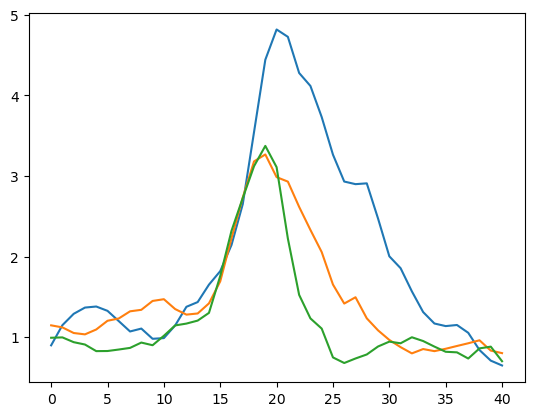

In [30]:
plt.plot(trough_df)

In [31]:
jca_name

'u'

In [33]:
# trough_df.to_csv(f'outputs/trough_df_{jca_name}.csv', index=False)
# npj_df.to_csv(f'outputs/npj_df_{jca_name}.csv', index=False)